# Basic PyToch Linear Regression Using "nn.Linear"

In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

a = 9   # random bias 
b = 3   # random weight

X = torch.arange(0, 1, 0.02).unsqueeze(dim = 1)
Y = a * X + b

In [2]:
# splitting data for train test in 80:20

split_x = int(0.8 * len(X))
split_y = int(0.8 * len(Y))

X_train = X[:split_x]
X_test = X[split_x:]

Y_train = Y[:split_y]
Y_test = Y[split_y:]

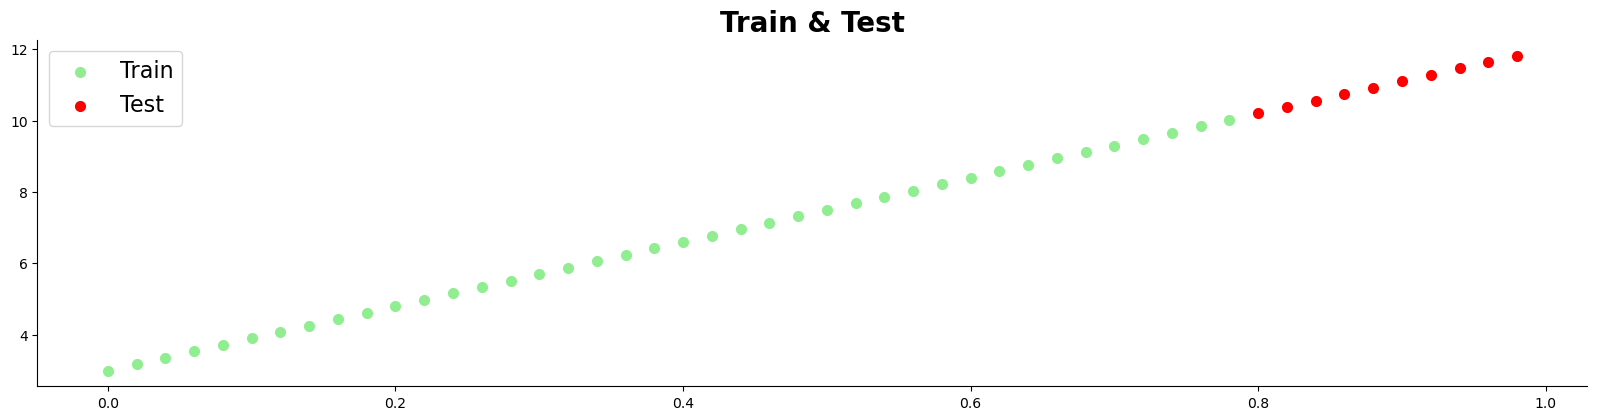

In [31]:
# visualize

plt.figure(figsize=(20, 4.5))
plt.scatter(X_train, Y_train, color = 'lightgreen', label = 'Train', lw = 2)
plt.scatter(X_test, Y_test, color = 'red', label = 'Test', lw = 2)
plt.title('Train & Test', fontweight = 'bold', fontsize = 20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(fontsize = 16)
plt.show()

In [3]:
class LinearRegression(nn.Module):    # -> heritance from nn.Module
    '''
    Create a class using nn.Linear (the other possibility is using nn.parameter)
    Applies a linear transformation to the incoming data: y = xA^T + b
    '''
    def __init__(self):
        super().__init__()
        
        self.linear_regression = torch.nn.Linear(in_features = 1,    # ->  size of each input sample
                                                 out_features = 1)   # size of each output sample
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_regression(x)
    
model = LinearRegression()     # create an instance of the class
model.state_dict()             # checking the first random weight & bias

OrderedDict([('linear_regression.weight', tensor([[-0.6899]])),
             ('linear_regression.bias', tensor([-0.9543]))])

In [4]:
# instance for the loss
loss = torch.nn.L1Loss()

# instance for the optimizer
optimizer = torch.optim.Adam(params = model.parameters(),     # can try SGD Optimizer
                             lr = 0.01)

In [5]:
torch.manual_seed(42)
dict = {}
epochs = 1200

for epoch in range(epochs + 1):
    
    model.train()
    
    y_pred_train = model(X_train)                   # using forward
    
    loss_train = loss(y_pred_train, Y_train)
    
    optimizer.zero_grad()                           # optimizer grad
    
    loss_train.backward()                           # perform bacpropagation
    
    optimizer.step()                                # optmizer step 
    
    model.eval()                                    # place the model to the evaluation mode
    
    with torch.inference_mode():                    # make predictions
        y_pred = model(X_test)
        loss_real = loss(y_pred, Y_test)
        
    if epoch % 200 == 0:
        print(f'Epoch {epoch}  -  Train Loss {loss_train}  -  Test Loss {loss_real}')
        dict[epoch] = epoch, loss_train.detach().numpy(), loss_real.detach().numpy()

Epoch 0  -  Train Loss 7.733406066894531  -  Test Loss 12.559459686279297
Epoch 200  -  Train Loss 4.953408241271973  -  Test Loss 8.779462814331055
Epoch 400  -  Train Loss 2.1761093139648438  -  Test Loss 5.000101089477539
Epoch 600  -  Train Loss 0.7989404797554016  -  Test Loss 2.1959526538848877
Epoch 800  -  Train Loss 0.5623291730880737  -  Test Loss 1.2410986423492432
Epoch 1000  -  Train Loss 0.36916136741638184  -  Test Loss 0.8159367442131042
Epoch 1200  -  Train Loss 0.149870365858078  -  Test Loss 0.32973575592041016


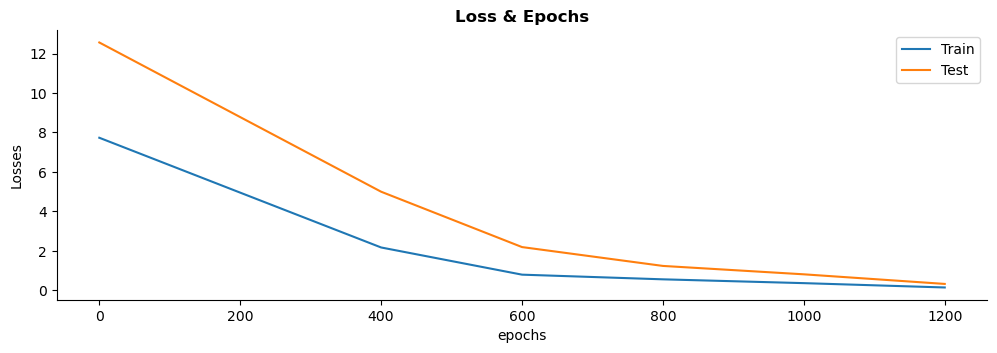

In [29]:
data = pd.DataFrame(dict)
data = data.T.rename(columns = {0: 'Epoch', 1: 'Train_Loss', 2: 'Test_Loss'})

plt.figure(figsize=(12, 3.5))
plt.plot(data.Epoch,data.Train_Loss, label = 'Train')
plt.plot(data.Epoch, data.Test_Loss, label = 'Test')
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.title('Loss & Epochs', fontweight = 'bold')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()

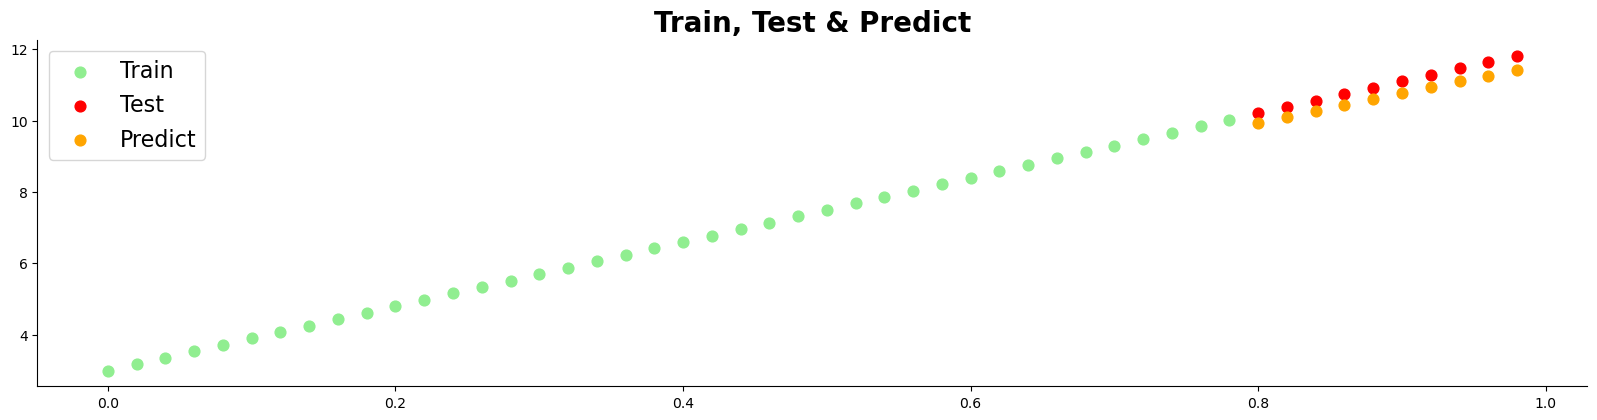

In [35]:
plt.figure(figsize=(20, 4.5))
plt.scatter(X_train, Y_train, color = 'lightgreen', label = 'Train', s = 60)
plt.scatter(X_test, Y_test, color = 'red', label = 'Test', s = 60)
plt.scatter(X_test, y_pred, color = 'orange', label = 'Predict', s = 60)
plt.title('Train, Test & Predict', fontweight = 'bold', fontsize = 20)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(fontsize = 16)
plt.show()

In [37]:
## Saving The Model
PATH = '/Users/admin/Desktop/ML/state_dict_model.pt'
torch.save(model.state_dict(), PATH)

In [39]:
# Load the model
model2 = LinearRegression()
model2.load_state_dict(torch.load(PATH))
model2.eval()

LinearRegression(
  (linear_regression): Linear(in_features=1, out_features=1, bias=True)
)